## Foreground Removal with PCA using sklearn.decomposition.PCA
For more information regardining PCA using scikit-learn packages see:
https://scikit-learn.org/stable/modules/decomposition.html#pca

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
### LOAD IN THE DATA ###
T_HI = np.load('MultiDarkSims/dT_HI.npy')    #HI intensity map
T_FG = np.load('MultiDarkSims/dT_FG.npy')     #foreground map
nx,ny,nz = np.shape(T_HI)

In [20]:
### MEAN CENTRE AND COMBINE SIMULATED FOREGROUNDS AND SIGNAL 
T_ALL = T_HI + T_FG
data_array = T_ALL #- np.mean(T_ALL)

In [21]:
### RESHAPE THE DATA AND SWAP AXES ###
axes = np.shape(data_array)
data = np.reshape(data_array,(axes[0]*axes[1],axes[2]))     #reshape data so long 1d array of pixels for each z

In [22]:
N = 3 #set number of foreground components

### Apply PCA to the Data

In [23]:
### APPLY PCA TO DATA ### 
pca = PCA(n_components=N)
S = pca.fit_transform(data)  # Reconstruct signals based on orthogonal components

In [27]:
### ESTIMATE FOREGROUND AND REMOVE IT FROM DATA ###
FG_est = pca.inverse_transform(S)  #estimate foreground

FG_est = FG_est.reshape([225,225,225]) 
FG_est = FG_est #- np.mean(FG_est)

clean = data_array - FG_est  #subtract foreground from data
print(np.mean(FG_est))

19185.402725981683


### Plot the Cleaned Data 

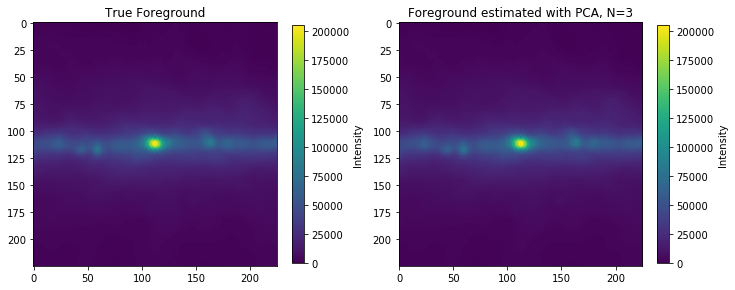

In [28]:
### PLOT TRUE AND ESTIMATED FOREGROUNDS ###
n = 0 #index of map to be plotted from data cube
fig = plt.figure(figsize=(12,6))
fig.subplots_adjust(wspace=0.2)

#plot HI intensity map 
plt.subplot(121)
plt.imshow(T_FG[:,:,n])
plt.title("True Foreground") #mean centre this foreground so that this is a good comparison plot

plt.colorbar(label = "Intensity", shrink = 0.73)

#plot HI intenisty map with foreground
plt.subplot(122)
plt.imshow(FG_est[:,:,n])
plt.title("Foreground estimated with PCA, N="+str(N))

plt.colorbar(label="Intensity", shrink = 0.73)

#plt.savefig("plots/test.png")                  #change filename

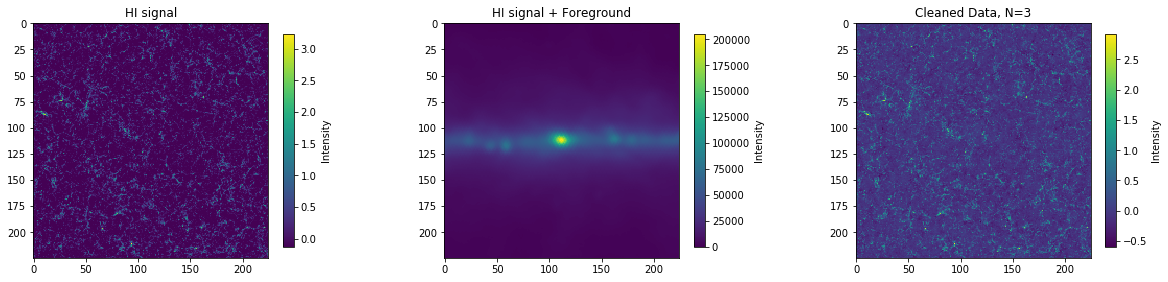

In [30]:
### PLOT HI SIGNAL, SIGNAL + DATA AND CLEANED DATA ###

n = 0 #index of map to be plotted from data cube
fig = plt.figure(figsize=(20,8))
fig.subplots_adjust(wspace=0.4)

#plot HI intensity map 
plt.subplot(131)
plt.imshow(T_HI[:,:,n])
plt.title("HI signal")

plt.colorbar(label = "Intensity", shrink = 0.49)

#plot HI intenisty map with foreground
plt.subplot(132)
plt.imshow(data_array[:,:,n])
plt.title("HI signal + Foreground")
plt.colorbar(label="Intensity", shrink = 0.49)

#plot cleaned data
plt.subplot(133)
plt.imshow(clean[:,:,n])
plt.title("Cleaned Data, N="+ str(N))
plt.colorbar(label = "Intensity", shrink = 0.49)

plt.savefig("plots/PCA-with-scikit-N="+str(N)+".png")                       #change filename

### FIND THE RESIDUALS OF THE CLEANED DATA

In [13]:
resids = T_HI - clean

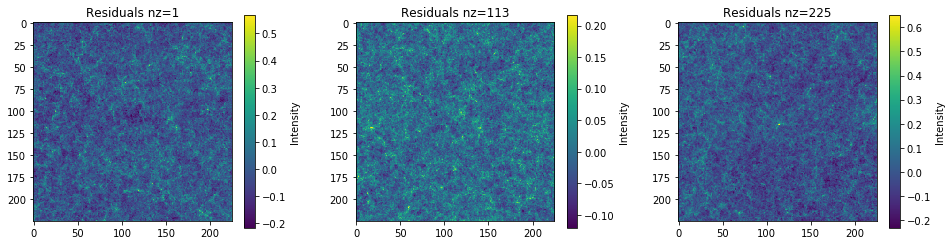

In [14]:
### PLOT HI SIGNAL, SIGNAL + DATA AND CLEANED DATA ###

fig = plt.figure(figsize=(16,8))
fig.subplots_adjust(wspace=0.3)

#plot HI intensity map 
plt.subplot(131)
plt.imshow(resids[:,:,0])
plt.title("Residuals Nz=1")

plt.colorbar(label = "Intensity", shrink = 0.49)

#plot HI intenisty map with foreground
plt.subplot(132)
plt.imshow(resids[:,:,112])
plt.title("Residuals Nz=113")
plt.colorbar(label="Intensity", shrink = 0.49)

#plot cleaned data
plt.subplot(133)
plt.imshow(resids[:,:,224])
plt.title("Residuals Nz=225")
plt.colorbar(label = "Intensity", shrink = 0.49)

#plt.savefig("plots/test.png")                       #change filename